# Simple Linear regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/Advertising.csv' , usecols=[1,2,3,4])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


/Users/tae/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


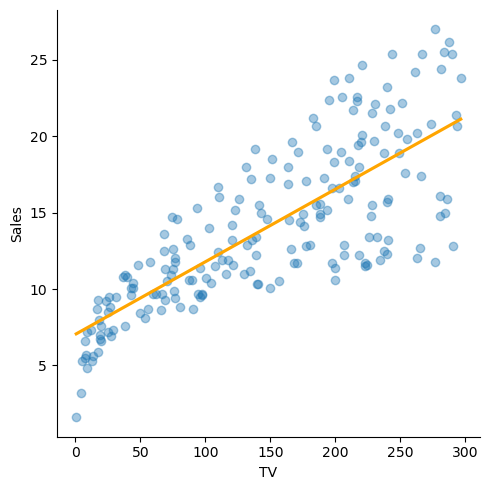

In [19]:
sns.lmplot(x='TV' , y='Sales' , data=df , ci=None , 
          scatter_kws={'alpha':0.4},
          line_kws={'color':'orange'})

/Users/tae/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


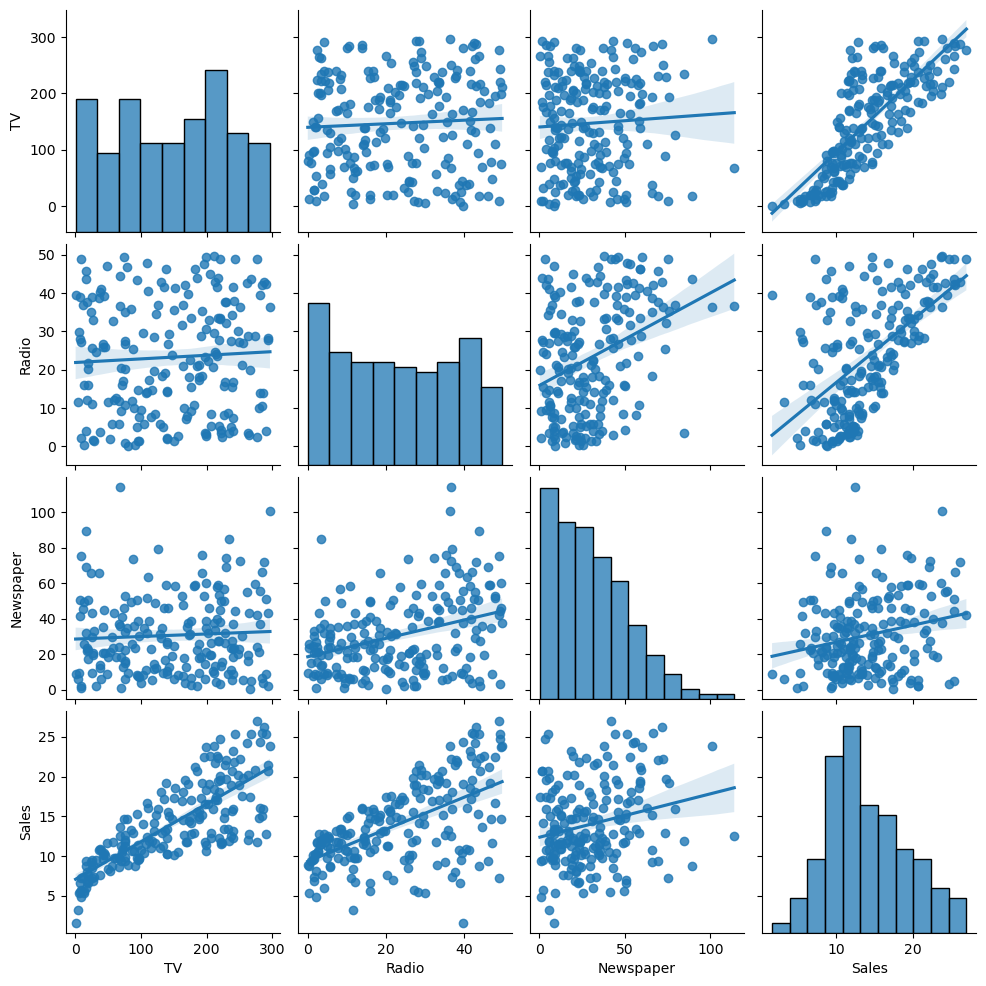

In [21]:
sns.pairplot(df, kind='reg')

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [26]:
print('Total data: ',len(df))
#Split
X = df.drop(columns=['Sales'])[:140]
y = df['Sales'][:140]

Total data:  200


In [27]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [28]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [29]:
model.fit(X,y)

LinearRegression()

In [34]:
print('R-squre:',model.score(X,y))
print('intercept:',model.intercept_)
print('coef:',model.coef_)

R-squre: 0.8937102367013778
intercept: 3.045142209037124
coef: [ 0.04704868  0.17968299 -0.00300557]


In [35]:
X_test = df.drop(columns=['Sales'])[140:]
X_test.head()

,TV,Radio,Newspaper
140,73.4,17.0,12.9
141,193.7,35.4,75.6
142,220.5,33.2,37.9
143,104.6,5.7,34.4
144,96.2,14.8,38.9


In [37]:
y_hat = model.predict(X_test)
y_hat

array([ 9.5143544 , 18.29202877, 19.27094064,  8.88723582, 10.11361706,
        9.96041972, 15.62706788, 23.1587013 , 12.03845031,  9.72212471,
       18.63809455, 10.10099867, 16.48589616, 18.12468609, 15.64364266,
        5.30523275, 15.12744231, 10.25358725, 10.09006252, 12.44362791,
       14.3210309 , 13.3616908 , 15.08443331, 17.32769433, 11.18435749,
       14.4341081 , 10.57847377, 13.65085298, 17.24682604, 18.30648623,
        7.42659652, 14.39756088,  7.52782982, 12.20541805, 14.08031808,
       24.73378746, 20.09744782, 12.3485591 , 16.40555117, 12.5803357 ,
       10.85519521, 14.21321462,  6.62420582, 24.08691176, 18.72317811,
       20.7349155 ,  9.90581943, 17.13834561, 18.98753788,  6.02878648,
       12.27110367,  8.5198605 ,  4.49610391, 18.42872767, 16.46701074,
        5.46575208,  8.33322951, 13.02457489, 23.73586521, 15.48426632])

In [44]:
combined = pd.concat([df[140:].reset_index(), pd.Series(y_hat ,name='predict') ] , axis='columns')

In [46]:
combined.tail()

,index,TV,Radio,Newspaper,Sales,predict
55,195,38.2,3.7,13.8,7.6,5.465752
56,196,94.2,4.9,8.1,9.7,8.333230
57,197,177.0,9.3,6.4,12.8,13.024575
58,198,283.6,42.0,66.2,25.5,23.735865
59,199,232.1,8.6,8.7,13.4,15.484266
